# Shubhi Srivastava





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
bn=pd.read_csv("Boston.ns.csv")

In [4]:
bn

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


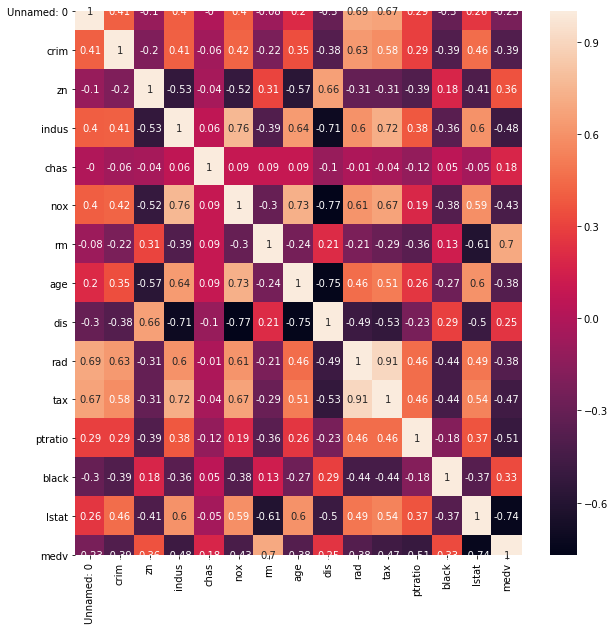

In [5]:
plt.figure(figsize=(10,10))
correlation_matrix=bn.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

In [6]:
X = pd.DataFrame(np.c_[bn['lstat'], bn['rm'], bn['crim'], bn['nox']])
Y = bn['medv']

print(X.shape)
print(Y.shape)

(506, 4)
(506,)


In [7]:
X

,0,1,2,3
0,4.98,6.575,0.00632,0.538
1,9.14,6.421,0.02731,0.469
2,4.03,7.185,0.02729,0.469
3,2.94,6.998,0.03237,0.458
4,5.33,7.147,0.06905,0.458
...,...,...,...,...
501,9.67,6.593,0.06263,0.573
502,9.08,6.120,0.04527,0.573
503,5.64,6.976,0.06076,0.573
504,6.48,6.794,0.10959,0.573


In [8]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 4)
(102, 4)
(404,)
(102,)


# Polynomial Regression using Pipeline


In [10]:
from sklearn.pipeline import make_pipeline
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,Y_train)
y_pred=polyreg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train,y_pred)))
r2=r2_score(Y_train,y_pred)
print("RMSE for training is:",rmse)
print("R2 score for training is:",r2)

RMSE for training is: 4.169326707780467
R2 score for training is: 0.7848107554125185


In [11]:
y_pred=polyreg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,y_pred)))
r2=r2_score(Y_test,y_pred)
print("RMSE for testing is:",rmse)
print("R2 score for testing is:",r2)

RMSE for testing is: 3.8889890611456277
R2 score for testing is: 0.8469631141782175


# Polynomial Regression

In [12]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly=poly_features.fit_transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
y_train_predicted = poly_model.predict(X_train_poly)
y_test_predicted = poly_model.predict(X_test_poly)

In [13]:
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
r2_train = r2_score(Y_train, y_train_predicted)     
print("The polynomial model performance for the training set")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

The polynomial model performance for the training set
RMSE of training set is 4.169326707780467
R2 score of training set is 0.7848107554125185


In [14]:
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predicted))
r2_test = r2_score(Y_test, y_test_predicted)
print("The polynomial model performance for the testing set")
print("RMSE of testing set is {}".format(rmse_test))
print("R2 score of testing set is {}".format(r2_test))

The polynomial model performance for the testing set
RMSE of testing set is 3.8889890611456277
R2 score of testing set is 0.8469631141782175


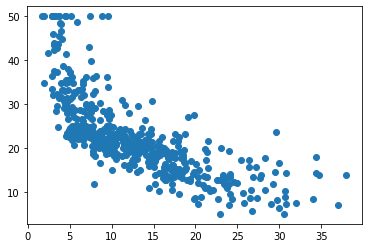

In [15]:
plt.scatter(bn["lstat"],bn["medv"])
plt.show()

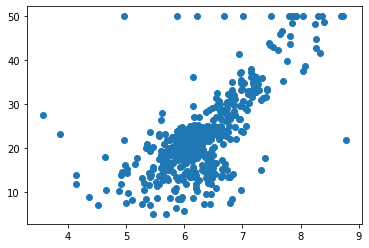

In [16]:
plt.scatter(bn["rm"],bn["medv"])
plt.show()

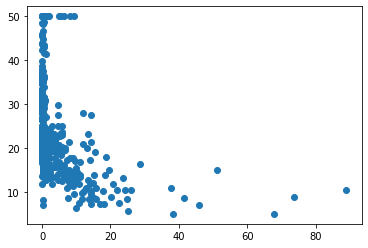

In [17]:
plt.scatter(bn["crim"],bn["medv"])
plt.show()

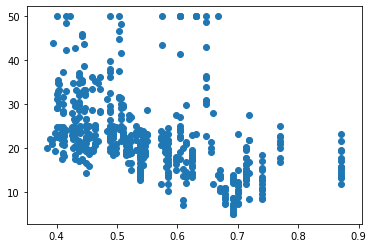

In [18]:
plt.scatter(bn["nox"],bn["medv"])
plt.show()

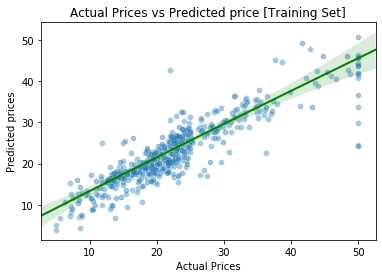

In [19]:
sns.scatterplot(Y_train, y_train_predicted, alpha=0.4)
sns.regplot(Y_test, y_test_predicted, scatter_kws={'s': 20, 'alpha':0.4}, line_kws={'color':'green', 'linewidth': 2}, order=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted price [Training Set]")
plt.show()

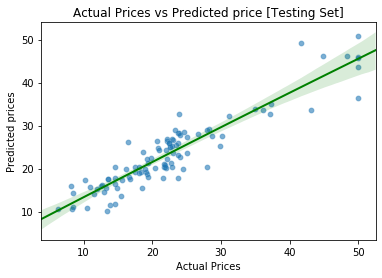

In [20]:
sns.scatterplot(Y_test, y_test_predicted, alpha=0.4)
sns.regplot(Y_test, y_test_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted price [Testing Set]")
plt.show()